In [1]:
# Lets Import teh required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
data = pd.read_csv("C:/Data-Science/Machine Learning/Demo Datasets/Lesson 4/Advertising.csv", index_col = 0)

In [3]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
data.shape

(200, 4)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

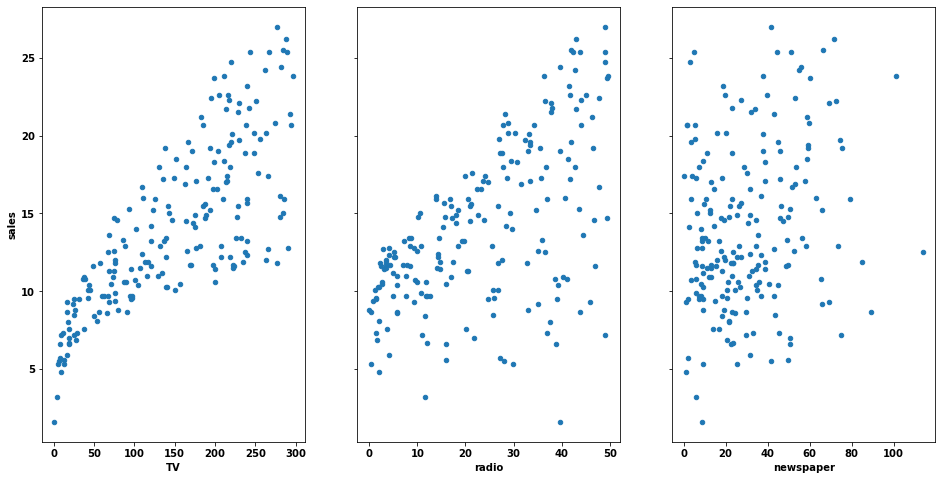

In [8]:
fig,axs = plt.subplots(1,3,sharey = True)
data.plot(kind ="scatter",x = "TV", y = "sales", ax = axs[0], figsize = (16,8))
data.plot(kind ="scatter",x = "radio", y = "sales", ax = axs[1])
data.plot(kind ="scatter",x = "newspaper", y = "sales", ax = axs[2])

In [9]:
feature_col = ["TV"]
x = data[feature_col]
y = data.sales

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [11]:
lm.fit(x,y)

LinearRegression()

In [12]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [13]:
# beta        +     slope*x
7.03259354  + 0.04753664 *50

9.409425539999999

In [14]:
X_new = pd.DataFrame({'TV': [50]})
X_new

,TV
0,50


In [15]:
lm.predict(X_new)

array([9.40942557])

In [16]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new

,TV
0,0.7
1,296.4


In [17]:
pred = lm.predict(X_new)
pred

array([ 7.0658692 , 21.12245377])

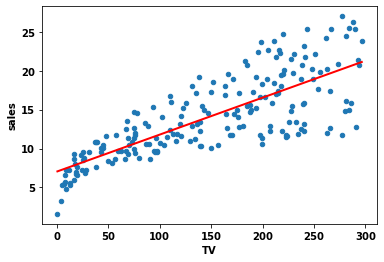

In [18]:
data.plot(kind = "scatter", x = "TV", y = "sales")
plt.plot(X_new, pred, c = "red", linewidth = 2)

In [19]:
import statsmodels.formula.api as smf

In [20]:
lmf = smf.ols(formula = "sales ~ TV", data = data ).fit()

In [21]:
lmf.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [22]:
lmf.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [23]:
lmf.rsquared

0.611875050850071

In [24]:
feature_cols = ['TV', 'radio','newspaper']
X = data[feature_cols]
Y = data['sales']
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [25]:
lm.fit(X,Y)

LinearRegression()

In [26]:
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [27]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [28]:
print(lm.intercept_)
print(lm.coef_)

2.70894909251591
[0.04405928 0.1992875  0.00688245]


In [29]:
predictions = lm.predict(xtest)

In [30]:
print(sqrt(mean_squared_error(ytest,predictions)))

1.9485372043446387


In [31]:
lmf = smf.ols(formula = 'sales~TV+radio+newspaper', data = data).fit()

In [32]:
lmf.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
radio,0.171547,0.205513
newspaper,-0.012616,0.010541


In [33]:
lmf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.58e-96
Time:                        14:35:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
import numpy as np
np.random.seed(12345)
nums = np.random.rand(len(data))
mask_large = nums >0.5
data['size'] = 'small'
data.loc[mask_large, 'size'] = 'large'
data.head()

,TV,radio,newspaper,sales,size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [39]:
data['islarge'] = data['size'].map({'small':0, 'large': 1})
data.head()

,TV,radio,newspaper,sales,size,islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [40]:
feature_cols = ['TV','radio','newspaper', 'islarge']
X = data[feature_cols]
Y = data['sales']

In [41]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size = 0.3, random_state = 23)

In [42]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [43]:
lm.coef_

array([0.04565869, 0.17748857, 0.00061668, 0.12391834])

In [44]:
lm.intercept_

2.9752436740978627

In [46]:
predictions = lm.predict(xtest)

In [47]:
print(sqrt(mean_squared_error(ytest,predictions)))

1.6121993360627982


In [48]:
lmf = smf.ols(formula = 'sales ~ TV + radio + newspaper+islarge', data = data).fit()

In [49]:
lmf.conf_int()

,0,1
Intercept,2.254662,3.568740
TV,0.042937,0.048503
radio,0.171624,0.205832
newspaper,-0.012715,0.010520
islarge,-0.421718,0.536565


In [51]:
lmf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           3.98e-95
Time:                        16:42:25   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9117      0.333      8.740      0.000       2.255       3.569
TV             0.0457      0.001     32.401      0.000       0.043       0.049
radio          0.1887      0.009     21.761      0.000       0.172       0.206
newspaper     -0.0011      0.006     -0.186      0.852      -0.013       0.011
islarge        0.0574      0.243      0.236      0.813      -0.422       0.537
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""